## Support Vector Machines

### Plotting Decision Boundaries

In [11]:
# Linear SVM : SVC
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC, LinearSVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

svm_clf = SVC(kernel = 'linear', C = float("inf"))
svm_clf.fit(X, y)
print(f"coeff : {svm_clf.coef_}")
print(f"bias : {svm_clf.intercept_}")
print(f"support_vectors : {svm_clf.support_vectors_}")

coeff : [[1.29411744 0.82352928]]
bias : [-3.78823471]
support_vectors : [[1.9 0.4]
 [3.  1.1]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

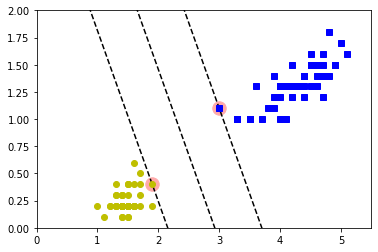

In [25]:
# Plotting Decision boundary
w = svm_clf.coef_[0]
b = svm_clf.intercept_[0]
svs = svm_clf.support_vectors_

# at boundary : w0*x0 + w1*x1 + b = 0
# x1 = -w0/w1 * x0 - b/w1

x0 = np.linspace(0, 6, 200)
decision_boundary = -w[0]/w[1] * x0 - b/w[1]

margin = 1/w[1]
margin_up = decision_boundary + margin
margin_down = decision_boundary - margin

plt.scatter(svs[:, 0], svs[:, 1], s = 180, facecolors = '#FFAAAA')
plt.plot(x0, decision_boundary, "k--")
plt.plot(x0, margin_up, "k--")
plt.plot(x0, margin_down, "k--")
plt.axis([0, 5.5, 0, 2])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")


### Noninear Data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

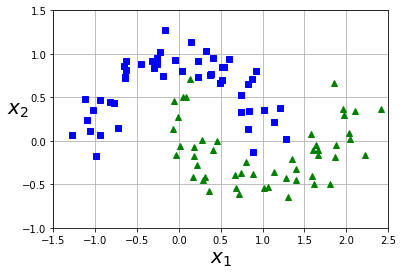

In [74]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

def plot_svm_fit(model, X, y):
    x0 = np.linspace(-1.5, 2.5, 200)
    x1 = np.linspace(-1.5, 1.5, 200)
    x0, x1 = np.meshgrid(x0, x1)
    X_mesh = np.c_[x0.ravel(), x1.ravel()]
    y_pred = model.predict(X_mesh).reshape(x0.shape)
    y_decision = model.decision_function(X_mesh).reshape(x0.shape)

    plt.contourf(x0, x1, y_decision)
    plt.contourf(x0, x1, y_pred)
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

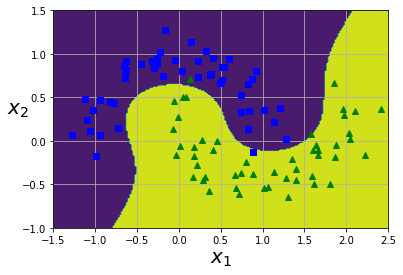

In [75]:
from sklearn.preprocessing import PolynomialFeatures
poly_svm_clf = Pipeline([
    ("poly", PolynomialFeatures(degree = 3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C = 10, loss = "hinge", random_state = 42))
])
poly_svm_clf.fit(X, y)

plot_svm_fit(poly_svm_clf, X, y)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

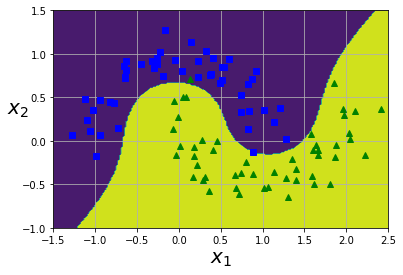

In [76]:
poly_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel = 'poly', C = 10, coef0 = 1, degree = 3,random_state = 42))
])
poly_svm_clf.fit(X, y)
plot_svm_fit(poly_svm_clf, X, y)

# Almost similar results with LinearSVC using polynomial features and SVC with polynomial kernels

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

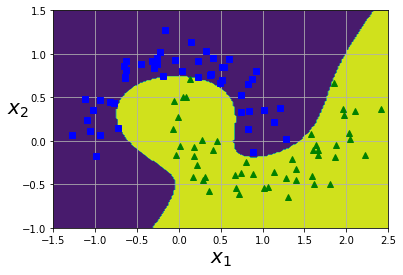

In [77]:
poly100_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
])
poly100_svm_clf.fit(X, y)
plot_svm_fit(poly100_svm_clf, X, y)

## Linear SVM using Gradient Descent

In [78]:
# Training set
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64).reshape(-1, 1) # Iris virginica

In [ ]:
from sklearn.base import BaseEstimator

class MyLinearSVC(BaseEstimator):
    def __init__(self, C=1, eta0=1, eta_d=10000, n_epochs=1000, random_state=None):
        self.C = C
        self.eta0 = eta0
        self.n_epochs = n_epochs
        self.random_state = random_state
        self.eta_d = eta_d

    def eta(self, epoch):
        return self.eta0 / (epoch + self.eta_d)
        
    def fit(self, X, y):
        # Random initialization
        if self.random_state:
            np.random.seed(self.random_state)
        w = np.random.randn(X.shape[1], 1) # n feature weights
        b = 0

        m = len(X)
        t = y * 2 - 1  # -1 if t==0, +1 if t==1
        X_t = X * t
        self.Js=[]

        # Training
        for epoch in range(self.n_epochs):
            support_vectors_idx = (X_t.dot(w) + t * b < 1).ravel()
            X_t_sv = X_t[support_vectors_idx]
            t_sv = t[support_vectors_idx]

            J = 1/2 * np.sum(w * w) + self.C * (np.sum(1 - X_t_sv.dot(w)) - b * np.sum(t_sv))
            self.Js.append(J)

            w_gradient_vector = w - self.C * np.sum(X_t_sv, axis=0).reshape(-1, 1)
            b_derivative = -C * np.sum(t_sv)
                
            w = w - self.eta(epoch) * w_gradient_vector
            b = b - self.eta(epoch) * b_derivative
            

        self.intercept_ = np.array([b])
        self.coef_ = np.array([w])
        support_vectors_idx = (X_t.dot(w) + t * b < 1).ravel()
        self.support_vectors_ = X[support_vectors_idx]
        return self

    def decision_function(self, X):
        return X.dot(self.coef_[0]) + self.intercept_[0]

    def predict(self, X):
        return (self.decision_function(X) >= 0).astype(np.float64)

C=2
svm_clf = MyLinearSVC(C=C, eta0 = 10, eta_d = 1000, n_epochs=60000, random_state=2)
svm_clf.fit(X, y)
svm_clf.predict(np.array([[5, 2], [4, 1]]))

In [5]:
# Non-Linear data
# Polynomial Features with Linear SVC

from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
X, y = make_moons(n_samples=100, noise=0.15)

poly_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 3)),
    ("scaling", StandardScaler()),
    ("svm", LinearSVC(C = 10, loss = "hinge"))
])

poly_svm_clf.fit(X, y)
poly_svm_clf.predict([[5.5, 1.7]])

array([1], dtype=int64)

In [6]:
# Non-Linear data
# Kernel Trick with SVC : Avoids exploding of features with PolyReg

from sklearn.svm import SVC
X, y = make_moons(n_samples=100, noise=0.15)

poly_kernel_svm_clf = Pipeline([
        ("scaling", StandardScaler()),
    ("svm", SVC(kernel = 'poly', degree = 3, coef0 = 1, C = 5))
])

poly_kernel_svm_clf.fit(X, y)
poly_kernel_svm_clf.predict([[5.5, 1.7]])

array([1], dtype=int64)

In [8]:
# Support Vector Regression
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon = 1.5)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5)

In [9]:
# Poly SVR
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel = 'poly', degree = 2, C = 0.1, epsilon = 0.1)
svm_poly_reg.fit(X, y)

SVR(C=0.1, degree=2, kernel='poly')